# Analyse Exploratoire

### Import des modules

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Analyse Exploratoire

In [162]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [164]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [166]:
building_consumption.shape

(3376, 46)

In [168]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [170]:
building_consumption.BuildingType.value_counts()
#on cherche à exclure les batiments résidentiels du Dataset, comme notre étude porte sur les bat non résidentiels.

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [172]:
building_consumption.PrimaryPropertyType.value_counts()
# on regarge si ça plus simple de filrer avec property type, or ce n'est pas le cas, car bcp plus de valeurs que building type.

PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

In [174]:
df = building_consumption[~building_consumption['BuildingType'].isin(['Multifamily LR (1-4)' , 'Multifamily MR (5-9)', 'Multifamily HR (10+)'])]
df.BuildingType.value_counts()
#on crée un nouveau DF en excluant les bat à usage résidentiel.

BuildingType
NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Nonresidential WA        1
Name: count, dtype: int64

In [176]:
df.info()
# on vérifie sur le nouveau DF les valeurs manquantes par colonnes et le type d'infos que nous avons.

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                            1668 non-null   object 
 8   ZipCode                          1652 non-null   float64
 9   TaxParcelIdentificationNumber    1668 non-null   object 
 10  CouncilDistrictCode              1668 non-null   int64  
 11  Neighborhood                     1668 non-null   object 
 12  Latitude                 

In [178]:
for col in df.columns:
    print(f"Valeurs pour la colonne '{col}':")
    print(df[col].value_counts())
    print("\n")

# on vérifie les valeurs qui reviennent le plus en vue de nettoyer le DF.

Valeurs pour la colonne 'OSEBuildingID':
OSEBuildingID
1        1
22953    1
23768    1
23762    1
23757    1
        ..
756      1
755      1
754      1
775      1
50226    1
Name: count, Length: 1668, dtype: int64


Valeurs pour la colonne 'DataYear':
DataYear
2016    1668
Name: count, dtype: int64


Valeurs pour la colonne 'BuildingType':
BuildingType
NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Nonresidential WA        1
Name: count, dtype: int64


Valeurs pour la colonne 'PrimaryPropertyType':
PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office              

In [180]:
df.describe()
# pour avoir plus d'infos au regard du cleaning.

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.0,1652.000000,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,...,1.666000e+03,1.665000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,0.0,1666.000000,1666.000000
mean,16336.346523,2016.0,98116.819613,4.356715,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,...,8.437933e+06,8.064790e+06,5.125726e+05,1.712630e+06,5.843493e+06,1.970845e+04,1.970845e+06,NaN,184.973301,1.607845
std,13835.292512,0.0,18.430353,2.191048,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,...,3.024380e+07,2.203878e+07,5.513944e+06,6.095172e+06,2.079673e+07,9.370814e+04,9.370814e+06,NaN,751.976001,2.336882
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,582.750000,2016.0,98105.000000,2.000000,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,...,1.229291e+06,1.294615e+06,0.000000e+00,2.114083e+05,7.213255e+05,0.000000e+00,0.000000e+00,NaN,19.967500,0.350000
50%,21143.500000,2016.0,98109.000000,4.000000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,...,2.554947e+06,2.685146e+06,0.000000e+00,4.724153e+05,1.611881e+06,4.982630e+03,4.982630e+05,NaN,49.580000,0.880000
75%,24602.250000,2016.0,98125.000000,7.000000,47.649675,-122.321675,1989.000000,1.000000,4.000000,1.053250e+05,...,6.913348e+06,7.109712e+06,0.000000e+00,1.420747e+06,4.847589e+06,1.520000e+04,1.520000e+06,NaN,142.382500,1.890000
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [182]:
df1= df.drop(columns=['DataYear','Address','PropertyName','NumberofBuildings','ComplianceStatus','LargestPropertyUseType',
                      'SecondLargestPropertyUseType','ThirdLargestPropertyUseType','TaxParcelIdentificationNumber',
                     'DefaultData','Comments','Outlier','YearsENERGYSTARCertified', 'City', 
                      'State', 'ZipCode', 'CouncilDistrictCode','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
                      'Electricity(kWh)', 'NaturalGas(therms)']).copy()
# on supprime l'ensemble des colonnes avec des informations redondantes, ou les infos dont nous aurons pas besoin dans notre analyse : 
# on supprime toutes les colonnes relatives à l'adresse et nous gardons à la place Latitue et Longitude.
# Data is the same pour tout le dataset donc on supprime.
# on supprime les informations en doublons ( 2 unités de mesures ), nous gardons une unité de mesure similaire ( GFA et WN(kBtu/sf et kBtu))
# on supprime les colonnes avec beaucoup de valeurs manquantes : comments, outliers, YearsENERGYSTARCertified

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   BuildingType                     1668 non-null   object 
 2   PrimaryPropertyType              1668 non-null   object 
 3   Neighborhood                     1668 non-null   object 
 4   Latitude                         1668 non-null   float64
 5   Longitude                        1668 non-null   float64
 6   YearBuilt                        1668 non-null   int64  
 7   NumberofFloors                   1668 non-null   int64  
 8   PropertyGFATotal                 1668 non-null   int64  
 9   PropertyGFAParking               1668 non-null   int64  
 10  PropertyGFABuilding(s)           1668 non-null   int64  
 11  ListOfAllPropertyUseTypes        1666 non-null   object 
 12  LargestPropertyUseTypeGFA

In [184]:
for col in df1.columns:
    print(f"Valeurs pour la colonne '{col}':")
    print(df1[col].value_counts())
    print("\n")

# on regarde les valeurs qui reviennet le plus pour les filtrer.

Valeurs pour la colonne 'OSEBuildingID':
OSEBuildingID
1        1
22953    1
23768    1
23762    1
23757    1
        ..
756      1
755      1
754      1
775      1
50226    1
Name: count, Length: 1668, dtype: int64


Valeurs pour la colonne 'BuildingType':
BuildingType
NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Nonresidential WA        1
Name: count, dtype: int64


Valeurs pour la colonne 'PrimaryPropertyType':
PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence

In [186]:
df1= df1[df1['PrimaryPropertyType'] != 'Low-Rise Multifamily' ]
# on supprime les bat dont l'usage principal est résidentiel

In [188]:
df1= df1[df1['PrimaryPropertyType'] != 'Residence Hall' ]
# on supprime les bat dont l'usage principal est résidentiel

In [190]:
df1= df1[df1['PrimaryPropertyType'] != 'Senior Care Community']
# on supprime les bat dont l'usage principal est résidentiel

In [192]:
df1.loc[df1['TotalGHGEmissions'] == 0, :]
# nous avons des lignes qui ne contiennent presque pas d'informations sur la consommation d'energie. Nous allons donc les supprimer.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
28,34,SPS-District K-12,K-12 School,Central,47.62266,-122.30547,1955,1,126351,0,...,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,242,SPS-District K-12,K-12 School,NORTH,47.69823,-122.32126,1989,2,52792,0,...,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,435,NonResidential,Other,DOWNTOWN,47.61195,-122.33167,1990,6,1400000,0,...,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,700,NonResidential,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,47.63718,-122.37734,2008,1,57176,0,...,31.0,214.100006,0.0,12525174.0,12843856.0,0.0,0.0,0.0,0.0,0.0
746,19776,NonResidential,Other,NORTHWEST,47.72777,-122.34503,2002,1,29924,0,...,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,21616,SPS-District K-12,K-12 School,NORTH,47.72369,-122.30676,1954,1,42292,0,...,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
df1= df1[df1['TotalGHGEmissions'] !=0 ]
df1.loc[df1['TotalGHGEmissions'] == 0, :]
# Nous n'avons plus de batiments avec 0 émissions de CO2.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity


In [196]:
mask = (df1['BuildingType'] == 'SPS-District K-12') & (df1['SiteEnergyUse(kBtu)'] == 0)

df1.loc[mask, 'SiteEnergyUse(kBtu)'] = (df1.loc[mask, 'SteamUse(kBtu)'] + df1.loc[mask, 'Electricity(kBtu)'] 
                                        +df1.loc[mask, 'NaturalGas(kBtu)'])

# on calcule energie use = sommes des différentes energies.


In [198]:
df1= df1[df1['SiteEnergyUse(kBtu)'] != 0 ]
df1= df1[df1['SiteEnergyUseWN(kBtu)'] != 0 ]

In [200]:
df1.loc[df1['SiteEnergyUseWN(kBtu)'] == 0, :]
# on peut pas filtrer car la plus part utilisent Electricity ou Gaz. on essaye de voir comment remplacer ces valeurs.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity


In [202]:
df1.loc[(df1['SteamUse(kBtu)'] > 0)]
# il n y a que 112 buildings utilisant Steam as energy source.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,DOWNTOWN,47.612200,-122.337990,1927,12,88434,0,...,60.0,84.300003,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83
2,3,NonResidential,Hotel,DOWNTOWN,47.613930,-122.338100,1969,41,956110,196718,...,43.0,97.699997,244.100006,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,2.19
3,5,NonResidential,Hotel,DOWNTOWN,47.614120,-122.336640,1926,10,61320,0,...,56.0,113.300003,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67
7,11,NonResidential,Other,DOWNTOWN,47.613270,-122.331360,1926,8,102761,0,...,NaN,68.800003,152.300003,6298131.5,7067881.5,2276286.50,3636655.0,385189.0,221.51,2.16
10,15,NonResidential,Hotel,DOWNTOWN,47.606950,-122.334140,1969,11,153163,19279,...,30.0,124.300003,233.000000,16016644.0,16646930.0,5237165.50,6187627.0,4591850.0,691.26,4.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,32429,NonResidential,Restaurant,DOWNTOWN,47.608050,-122.339780,1985,13,42000,0,...,NaN,147.300003,333.100006,7798464.0,7762660.5,2513519.25,4351882.0,933062.0,273.91,6.52
3156,45927,NonResidential,Laboratory,EAST,47.604270,-122.323110,2000,8,178000,0,...,NaN,302.700012,594.400024,53166156.0,55068016.0,31030194.00,22135959.0,0.0,2549.47,14.32
3182,49725,NonResidential,Other,EAST,47.609890,-122.326590,2012,7,267470,0,...,NaN,159.699997,361.399994,42584028.0,42715544.0,18547858.00,23795911.0,0.0,1597.56,5.97
3261,49926,NonResidential,University,EAST,47.617484,-122.321853,1925,3,428347,0,...,NaN,82.500000,187.300003,37022180.0,38977108.0,13556219.00,21930618.0,1535341.0,1280.81,2.99


In [204]:
df1.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1.598000e+03,1.592000e+03,831.000000,...,1048.000000,1595.000000,1596.000000,1.596000e+03,1.595000e+03,1.596000e+03,1.596000e+03,1.596000e+03,1596.000000,1596.000000
mean,16152.877972,47.615044,-122.333159,1961.592616,4.124531,1.130269e+05,13109.274093,9.991761e+04,9.257497e+04,36417.233811,...,65.677481,75.398245,181.138659,7.980225e+06,8.202963e+06,4.700455e+05,5.531678e+06,1.952277e+06,178.530796,1.599937
std,13658.919175,0.048031,0.024428,32.780496,6.648441,1.941043e+05,42836.174967,1.720549e+05,1.593201e+05,66945.302667,...,28.358077,75.366868,187.845997,2.191983e+07,2.244191e+07,5.212957e+06,1.356210e+07,9.522628e+06,715.224664,2.341828
min,1.000000,47.499170,-122.411820,1900.000000,0.000000,1.128500e+04,0.000000,1.092500e+04,5.656000e+03,0.000000,...,1.000000,0.700000,-2.100000,1.680890e+04,1.726000e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,584.250000,47.584460,-122.343170,1930.000000,1.000000,2.927850e+04,0.000000,2.829800e+04,2.543900e+04,5350.000000,...,49.000000,36.400000,81.149998,1.243815e+06,1.324536e+06,0.000000e+00,7.243368e+05,0.000000e+00,20.042500,0.350000
50%,21143.500000,47.611900,-122.333105,1965.000000,2.000000,4.872450e+04,0.000000,4.672100e+04,4.303300e+04,12000.000000,...,73.000000,54.200001,135.150002,2.546626e+06,2.709055e+06,0.000000e+00,1.598630e+06,4.962285e+05,49.215000,0.870000
75%,24586.500000,47.648330,-122.322153,1989.000000,4.000000,1.039778e+05,0.000000,9.430050e+04,9.008625e+04,31954.500000,...,89.000000,85.149998,205.800003,6.882718e+06,7.192840e+06,0.000000e+00,4.895578e+06,1.472630e+06,134.805000,1.862500
max,50226.000000,47.733870,-122.258640,2015.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,639931.000000,...,100.000000,834.400024,2620.000000,4.483853e+08,4.716139e+08,1.349435e+08,2.745325e+08,2.979090e+08,16870.980000,34.090000


In [206]:
df1.loc[df1['PropertyGFATotal']== 2200000.00 , :]
# Je vérifie certaines valeurs max, pour voir si ce n'est pas des outliers à éliminer. 
# donc ce cas non c'est bien un vrai Grand Campus universitaire.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1494,22062,Campus,University,EAST,47.61065,-122.31711,1939,2,2200000,0,...,NaN,71.599998,151.300003,114648520.0,123205560.0,0.0,61672821.0,52975694.0,3243.48,1.47


In [208]:
df1.loc[df['SiteEnergyUseWN(kBtu)'] == 471613856.00, :]
# il s'agit d'un centre industriel de Boeing. le campus comprend plusieurs bâtiments d’assemblage et des entrepôts.
# cela explique la grosse consommation d'energie. Donc valeur extrême mais pas un outlier.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
35,43,Campus,Mixed Use Property,GREATER DUWAMISH,47.53493,-122.31788,1992,3,494835,0,...,8.0,233.100006,400.299988,448385312.0,471613856.0,0.0,150476283.0,297909000.0,16870.98,34.09


In [210]:
df1.loc[df1['SiteEnergyUse(kBtu)'] == 448385312.00 , :]
# c'est le même campus ayant le max de PropertyGFATotal

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
35,43,Campus,Mixed Use Property,GREATER DUWAMISH,47.53493,-122.31788,1992,3,494835,0,...,8.0,233.100006,400.299988,448385312.0,471613856.0,0.0,150476283.0,297909000.0,16870.98,34.09


In [212]:
df1.loc[df1['Electricity(kBtu)'] < 0 , :]
# ici il s'agit certainement d'une erreur chiffre négatif au lieu de positif, car ces bureaux n'utilisent aucune source d'energie, 
# autre que electricité.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
3206,49784,NonResidential,Small- and Mid-Sized Office,CENTRAL,47.61432,-122.31257,2013,6,52000,0,...,100.0,5.0,-2.1,342726.0938,240132.0938,0.0,-115417.0,0.0,-0.8,-0.02


In [214]:
df1.loc[(df1['PropertyGFATotal'] < 60000 ) 
& (df1['PrimaryPropertyType'] == 'Small- and Mid-Sized Office' ) 
& (df1['YearBuilt'] > 2010), : ]
# Après investigation, le chiffre semble décroché. je préfère le supprimer du Dataset pour ne pas influencer les résultats.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1329,21534,NonResidential,Small- and Mid-Sized Office,LAKE UNION,47.61952,-122.34462,2013,3,51552,0,...,NaN,28.1,88.199997,1.539066e+06,1.539066e+06,0.0,1539066.0,0.0,10.73,0.21
3206,49784,NonResidential,Small- and Mid-Sized Office,CENTRAL,47.61432,-122.31257,2013,6,52000,0,...,100.0,5.0,-2.100000,3.427261e+05,2.401321e+05,0.0,-115417.0,0.0,-0.80,-0.02
3312,50026,NonResidential,Small- and Mid-Sized Office,EAST,47.61371,-122.31774,2015,5,37873,0,...,NaN,62.0,136.399994,2.346692e+06,2.346692e+06,0.0,1292155.0,1054537.0,65.01,1.72


In [216]:
df1= df1[df1['Electricity(kBtu)'] > 0 ]
df1.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,...,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1.594000e+03,1594.000000,1.594000e+03,1.590000e+03,831.000000,...,1047.000000,1593.000000,1594.000000,1.594000e+03,1.593000e+03,1.594000e+03,1.594000e+03,1.594000e+03,1594.000000,1594.000000
mean,16130.085320,47.615028,-122.333179,1961.643664,4.126725,1.131978e+05,13142.170640,1.000556e+05,9.263362e+04,36417.233811,...,65.644699,75.319586,181.188708,7.982803e+06,8.205669e+06,4.706353e+05,5.538691e+06,1.947507e+06,178.371870,1.593187
std,13640.772034,0.048075,0.024448,32.735617,6.655942,1.943162e+05,42884.878278,1.722470e+05,1.594117e+05,66945.302667,...,28.351755,75.233797,187.889916,2.193257e+07,2.245493e+07,5.216202e+06,1.356916e+07,9.525468e+06,715.577277,2.322313
min,1.000000,47.499170,-122.411820,1900.000000,0.000000,1.128500e+04,0.000000,1.092500e+04,5.656000e+03,0.000000,...,1.000000,0.700000,0.000000,1.680890e+04,1.726000e+04,0.000000e+00,3.000000e+00,0.000000e+00,0.120000,0.000000
25%,583.250000,47.584335,-122.343225,1930.000000,1.000000,2.927850e+04,0.000000,2.829800e+04,2.541700e+04,5350.000000,...,49.000000,36.500000,81.224998,1.244409e+06,1.326178e+06,0.000000e+00,7.254918e+05,0.000000e+00,20.085000,0.350000
50%,21141.500000,47.611900,-122.333160,1965.000000,2.000000,4.872450e+04,0.000000,4.672100e+04,4.300800e+04,12000.000000,...,73.000000,54.200001,135.150002,2.546626e+06,2.709055e+06,0.000000e+00,1.600884e+06,4.962285e+05,49.215000,0.870000
75%,24584.000000,47.648330,-122.322198,1989.000000,4.000000,1.040742e+05,0.000000,9.445250e+04,9.025875e+04,31954.500000,...,89.000000,85.099998,205.700001,6.872129e+06,7.181600e+06,0.000000e+00,4.897033e+06,1.471661e+06,134.772500,1.857500
max,50226.000000,47.733870,-122.258640,2015.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,639931.000000,...,100.000000,834.400024,2620.000000,4.483853e+08,4.716139e+08,1.349435e+08,2.745325e+08,2.979090e+08,16870.980000,34.090000


In [218]:
df1.shape

(1594, 25)

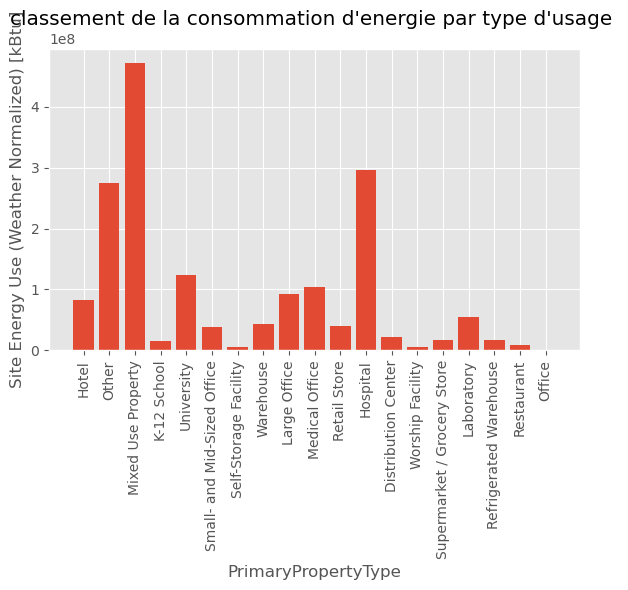

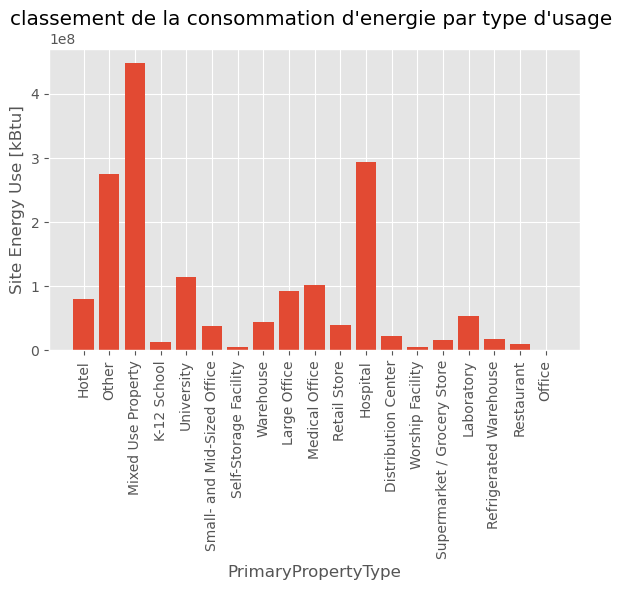

In [220]:
plt.figure(figsize=(6, 6))
plt.bar(
    x=df1['PrimaryPropertyType'].astype(str),
    height=df1['SiteEnergyUseWN(kBtu)'])
plt.xlabel("PrimaryPropertyType")
plt.xticks(rotation=90)
plt.ylabel("Site Energy Use (Weather Normalized) [kBtu]")
plt.title("classement de la consommation d'energie par type d'usage ")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
plt.bar(
    x=df1['PrimaryPropertyType'].astype(str),
    height=df1['SiteEnergyUse(kBtu)'])
plt.xlabel("PrimaryPropertyType")
plt.xticks(rotation=90)
plt.ylabel("Site Energy Use [kBtu]")
plt.title("classement de la consommation d'energie par type d'usage ")
plt.tight_layout()
plt.show()
# Nous constatons que les mixed use properties ont la plus grande consommation d'energie, suivis par other et les hopitaux.

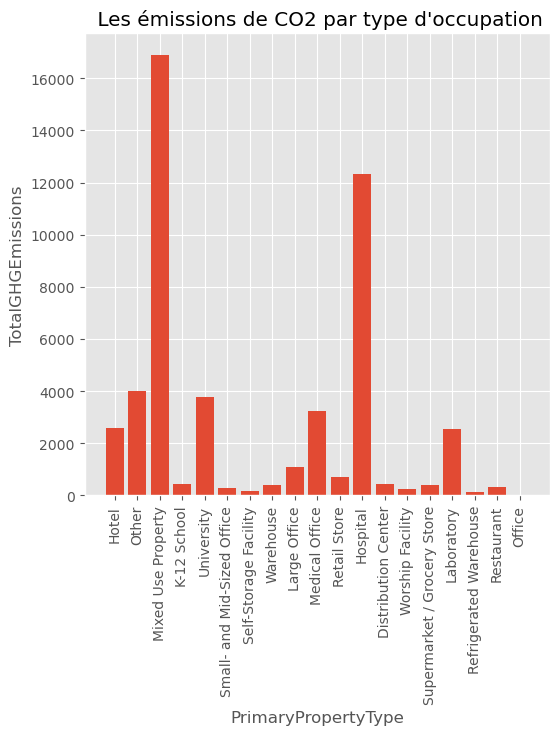

In [222]:
plt.figure(figsize=(6, 6))
plt.bar(
    x=df1['PrimaryPropertyType'].astype(str),
    height=df1['TotalGHGEmissions'])
plt.xlabel("PrimaryPropertyType")
plt.xticks(rotation=90)
plt.ylabel("TotalGHGEmissions")
plt.title(" Les émissions de CO2 par type d'occupation")
plt.show()

# Les mixed use properties sont les plus polluants, suivis par les hopitaux.

In [224]:
df1['Mono-usage'] = (df1['SecondLargestPropertyUseTypeGFA'].isna()) & (df1['ThirdLargestPropertyUseTypeGFA'].isna())
df1

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Mono-usage
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,84.300003,189.000000,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83,True
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,97.900002,179.399994,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86,False
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,97.699997,244.100006,7.258702e+07,7.393711e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19,True
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,113.300003,224.000000,6.794584e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67,True
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,118.699997,215.600006,1.417261e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,47.56722,-122.31154,1990,1,12294,0,...,76.699997,176.100006,8.497457e+05,9.430032e+05,0.00,5.242709e+05,3.254750e+05,20.94,1.70,True
3372,50223,Nonresidential COS,Other,DOWNTOWN,47.59625,-122.32283,2004,1,16000,0,...,65.900002,118.900002,9.502762e+05,1.053706e+06,0.00,3.965461e+05,5.537300e+05,32.17,2.01,True
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,13157,0,...,460.100006,767.799988,5.765898e+06,6.053764e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99,False
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,47.52832,-122.32431,1989,1,14101,0,...,55.500000,110.800003,7.194712e+05,7.828413e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57,False


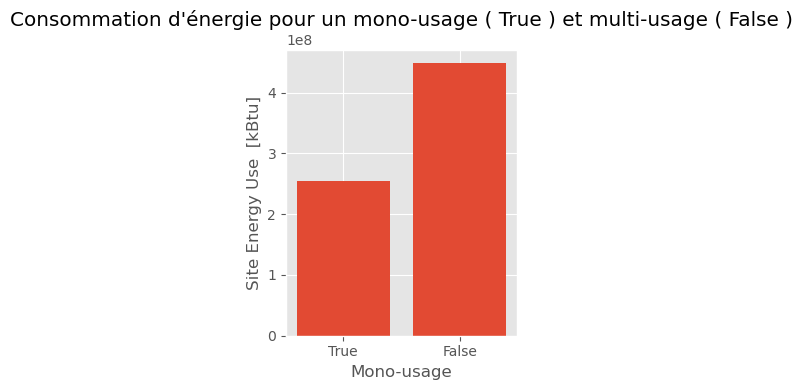

In [226]:
plt.figure(figsize=(3, 4))
plt.bar(
    x=df1['Mono-usage'].astype(str),
    height=df1['SiteEnergyUse(kBtu)'])
plt.xlabel("Mono-usage")
plt.ylabel("Site Energy Use  [kBtu]")
plt.title("Consommation d'énergie pour un mono-usage ( True ) et multi-usage ( False )")
plt.tight_layout()
plt.show()

# Nous remarquons que la consommation d'énergie est plus importante quand le batiment est multi usage.   


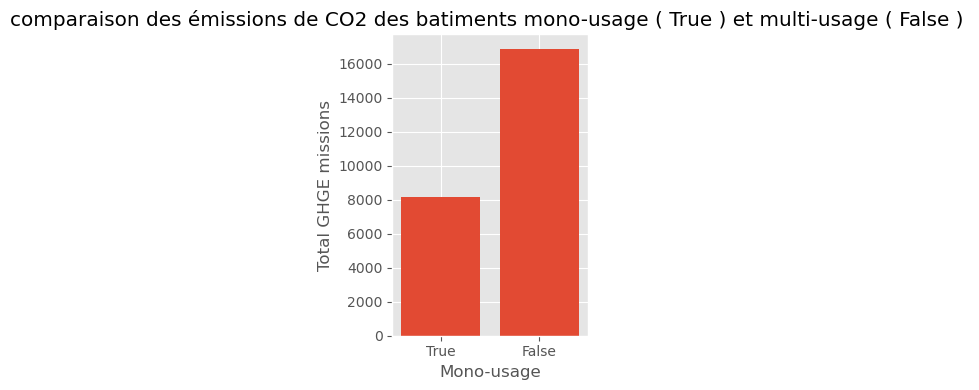

In [228]:
plt.figure(figsize=(3, 4))
plt.bar(
    x=df1['Mono-usage'].astype(str),
    height=df1['TotalGHGEmissions'])
plt.xlabel("Mono-usage")
plt.ylabel("Total GHGE missions")
plt.title("comparaison des émissions de CO2 des batiments mono-usage ( True ) et multi-usage ( False ) ")
plt.tight_layout()
plt.show()

# Les batiments multi usage émettent beaucoup plus de CO2 que les batiments mono usage.

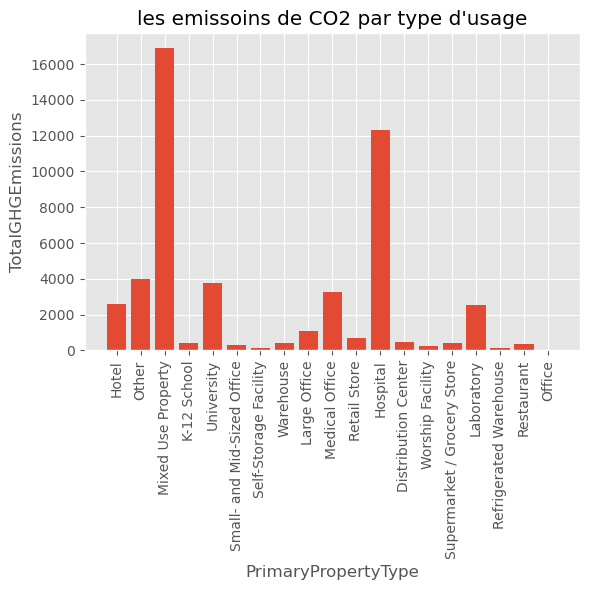

In [230]:
plt.figure(figsize=(6, 6))
plt.bar(
    x=df1['PrimaryPropertyType'].astype(str),
    height=df1['TotalGHGEmissions'])
plt.xlabel("PrimaryPropertyType")
plt.xticks(rotation=90)
plt.ylabel("TotalGHGEmissions")
plt.title("les emissoins de CO2 par type d'usage")
plt.tight_layout()
plt.show()

<Axes: xlabel='PropertyGFATotal', ylabel='SiteEnergyUseWN(kBtu)'>

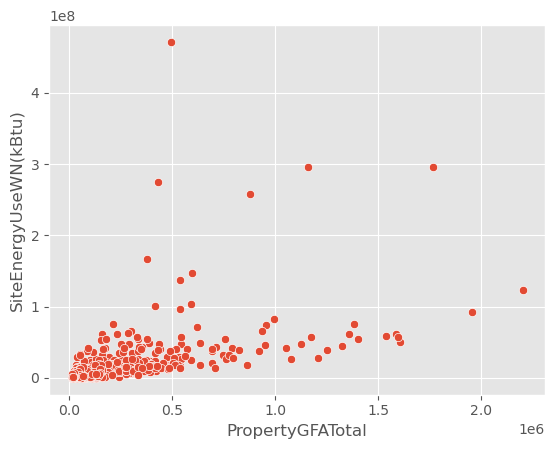

In [232]:
sns.scatterplot( x=df1['PropertyGFATotal'], y=df1['SiteEnergyUseWN(kBtu)'])

# les outliers empêchent l'interprétation du graph

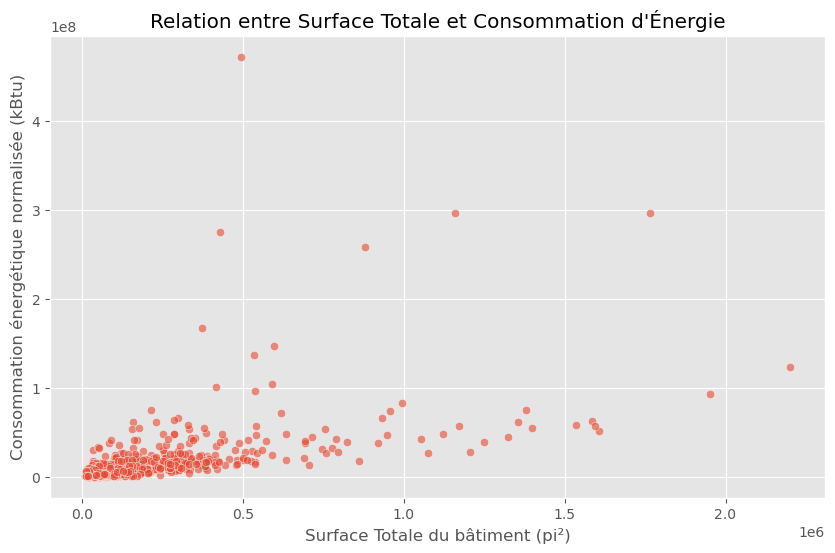

In [234]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='PropertyGFATotal', y='SiteEnergyUseWN(kBtu)', alpha=0.6)
plt.title("Relation entre Surface Totale et Consommation d'Énergie")
plt.xlabel("Surface Totale du bâtiment (pi²)")
plt.ylabel("Consommation énergétique normalisée (kBtu)")
plt.grid(True)
plt.show()
# on aperçoit une linéarité, mais ce n'est pas visible à cause des outliers.

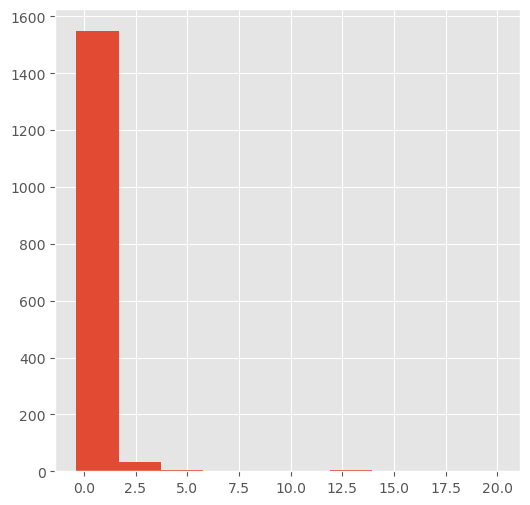

In [236]:
from scipy import stats
df1['zscore_energyuse'] = stats.zscore(df1['SiteEnergyUse(kBtu)'])
df1['zscore_energyuse']

fig = plt.figure(figsize=(6, 6))
df1.zscore_energyuse.hist()
plt.grid(True)

# il y a bien des outliers.

In [238]:
df1[df1.zscore_energyuse > 2].shape[0]

37

In [240]:
df1[df1['zscore_energyuse'] > 3 ].shape[0]

16

In [242]:
df1.loc[df1['zscore_energyuse'] > 3, : ]

# ce n'est pas des outliers mais plutôt les building les plus energivores.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Mono-usage,zscore_energyuse
35,43,Campus,Mixed Use Property,GREATER DUWAMISH,47.534930,-122.317880,1992,3,494835,0,...,400.299988,448385312.0,471613856.0,0.0,150476283.0,297909000.0,16870.98,34.09,False,20.086141
49,63,NonResidential,Hotel,DOWNTOWN,47.610870,-122.333390,1982,34,994212,146694,...,184.500000,80469216.0,82318072.0,11598686.0,45545529.0,23324992.0,2451.58,2.47,False,3.306004
124,198,NonResidential,Hospital,NORTHEAST,47.662310,-122.281460,1953,10,879000,0,...,576.599976,253832464.0,257764208.0,0.0,115641210.0,138191238.0,8145.52,9.27,True,11.212858
167,268,NonResidential,Hospital,CENTRAL,47.607050,-122.309660,1990,5,597519,0,...,459.200012,143423024.0,147299056.0,0.0,58754927.0,84668094.0,4906.33,8.21,False,6.177239
170,276,NonResidential,Hospital,EAST,47.603990,-122.323770,2000,8,1158691,0,...,502.799988,293090784.0,296671744.0,122575032.0,168683602.0,1832129.0,10734.57,9.26,False,13.003375
309,440,NonResidential,Mixed Use Property,LAKE UNION,47.619150,-122.348570,2001,6,213834,104922,...,2217.800049,75073888.0,75073888.0,0.0,74917352.0,156525.0,530.59,2.48,False,3.059930
340,477,Campus,Other,LAKE UNION,47.628550,-122.330350,1997,5,535947,0,...,515.599976,131373880.0,137106112.0,0.0,64627449.0,66746425.0,3995.45,7.45,False,5.627694
477,640,NonResidential,Large Office,GREATER DUWAMISH,47.581810,-122.335340,1912,6,1380959,0,...,147.199997,74130576.0,75252304.0,0.0,67760546.0,6370020.0,810.70,0.59,False,3.016907
558,753,NonResidential,Other,DOWNTOWN,47.614380,-122.338710,1981,33,429405,0,...,2008.000000,274682208.0,274725984.0,0.0,274532495.0,149672.0,1921.82,4.48,False,12.163786
559,775,NonResidential,Large Office,DOWNTOWN,47.604540,-122.330720,1985,76,1952220,319400,...,166.500000,92937640.0,92537256.0,0.0,87851862.0,5085763.0,882.56,0.45,False,3.874671


In [244]:
df1.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Mono-usage', 'zscore_energyuse'],
      dtype='object')

In [246]:
df1['zscore_totalemissions'] = stats.zscore(df1['TotalGHGEmissions'])
df1['zscore_totalemissions']

0       0.100102
1       0.164238
2       2.671281
3       0.151056
4       0.456611
          ...   
3371   -0.220076
3372   -0.204377
3373    0.063141
3374   -0.218440
3375   -0.191656
Name: zscore_totalemissions, Length: 1594, dtype: float64

In [248]:
df1['Building_Age'] = 2016 - df1['YearBuilt']
df1.head()
# ça pourrait donner une idée sur la conso des bat veilliots.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Mono-usage,zscore_energyuse,zscore_totalemissions,Building_Age
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83,True,-0.034500,0.100102,89
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86,False,0.018477,0.164238,20
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,True,2.946508,2.671281,47
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67,True,-0.054193,0.151056,90
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88,False,0.282308,0.456611,36


<Axes: xlabel='PropertyGFATotal', ylabel='SiteEnergyUseWN(kBtu)'>

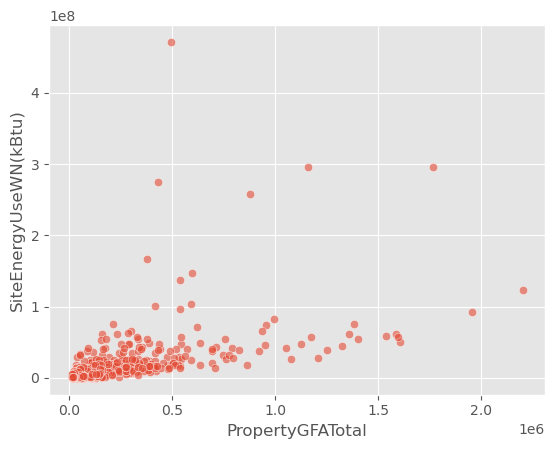

In [250]:
sns.scatterplot(data=df1, x='PropertyGFATotal', y='SiteEnergyUseWN(kBtu)', alpha=0.6)

In [252]:
df1['Emissions_per_Surface'] = df1['TotalGHGEmissions'] / (df1['PropertyGFATotal'])
df1.head()
# avoir les ratio des emissions par surface ( m2 ou sf )

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Mono-usage,zscore_energyuse,zscore_totalemissions,Building_Age,Emissions_per_Surface
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,2003882.00,3946027.0,1276453.0,249.98,2.83,True,-0.034500,0.100102,89,0.002827
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,0.00,3242851.0,5145082.0,295.86,2.86,False,0.018477,0.164238,20,0.002857
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,21566554.00,49526664.0,1493800.0,2089.28,2.19,True,2.946508,2.671281,47,0.002185
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,2214446.25,2768924.0,1811213.0,286.43,4.67,True,-0.054193,0.151056,90,0.004671
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,0.00,5368607.0,8803998.0,505.01,2.88,False,0.282308,0.456611,36,0.002876


In [254]:
df1['Emissions_per_Surface'].describe()
# ça parrait pas très représentatif. peut-être 

count    1594.000000
mean        0.001593
std         0.002322
min         0.000003
25%         0.000351
50%         0.000871
75%         0.001859
max         0.034094
Name: Emissions_per_Surface, dtype: float64

In [256]:
df1['GFA-1use_ratio'] = df1['LargestPropertyUseTypeGFA'] / df1['PropertyGFATotal']
df1.head()
# ratio de la plus grande property use par rapport à la superficie total du batiment. 

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Mono-usage,zscore_energyuse,zscore_totalemissions,Building_Age,Emissions_per_Surface,GFA-1use_ratio
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,3946027.0,1276453.0,249.98,2.83,True,-0.034500,0.100102,89,0.002827,1.000000
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,3242851.0,5145082.0,295.86,2.86,False,0.018477,0.164238,20,0.002857,0.809918
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,49526664.0,1493800.0,2089.28,2.19,True,2.946508,2.671281,47,0.002185,0.791220
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,2768924.0,1811213.0,286.43,4.67,True,-0.054193,0.151056,90,0.004671,1.000000
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,5368607.0,8803998.0,505.01,2.88,False,0.282308,0.456611,36,0.002876,0.703070


In [258]:
df1['GFA_per_Floor'] = df1['PropertyGFATotal'] / df1['NumberofFloors']
df1.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Mono-usage,zscore_energyuse,zscore_totalemissions,Building_Age,Emissions_per_Surface,GFA-1use_ratio,GFA_per_Floor
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,1276453.0,249.98,2.83,True,-0.034500,0.100102,89,0.002827,1.000000,7369.500000
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,5145082.0,295.86,2.86,False,0.018477,0.164238,20,0.002857,0.809918,9415.090909
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,1493800.0,2089.28,2.19,True,2.946508,2.671281,47,0.002185,0.791220,23319.756098
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,1811213.0,286.43,4.67,True,-0.054193,0.151056,90,0.004671,1.000000,6132.000000
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,8803998.0,505.01,2.88,False,0.282308,0.456611,36,0.002876,0.703070,9754.444444


In [260]:
df1['Emissions_per_floor'] = df1['TotalGHGEmissions'] / df1['NumberofFloors']
df1.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,TotalGHGEmissions,GHGEmissionsIntensity,Mono-usage,zscore_energyuse,zscore_totalemissions,Building_Age,Emissions_per_Surface,GFA-1use_ratio,GFA_per_Floor,Emissions_per_floor
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,249.98,2.83,True,-0.034500,0.100102,89,0.002827,1.000000,7369.500000,20.831667
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,295.86,2.86,False,0.018477,0.164238,20,0.002857,0.809918,9415.090909,26.896364
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,2089.28,2.19,True,2.946508,2.671281,47,0.002185,0.791220,23319.756098,50.958049
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,286.43,4.67,True,-0.054193,0.151056,90,0.004671,1.000000,6132.000000,28.643000
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,505.01,2.88,False,0.282308,0.456611,36,0.002876,0.703070,9754.444444,28.056111


In [262]:
df1['Elec_ratio'] = df1['Electricity(kBtu)'] / df1['SiteEnergyUse(kBtu)']
df1['steam_ratio'] = df1['SteamUse(kBtu)'] / df1['SiteEnergyUse(kBtu)']
df1['NGas_ratio'] = df1['NaturalGas(kBtu)'] / df1['SiteEnergyUse(kBtu)']

In [264]:
import numpy as np
df1['Elec_sourced_en'] = np.where(df1['Electricity(kBtu)'] > 0, 1, 0)
df1['Steam_sourced_en'] = np.where(df1['SteamUse(kBtu)'] > 0, 1, 0)
df1['NGas_sourced_en'] = np.where(df1['NaturalGas(kBtu)'] > 0, 1, 0)
df1.head()

# permet de savoir quel type d'energie est utilisé par le building.

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,Emissions_per_Surface,GFA-1use_ratio,GFA_per_Floor,Emissions_per_floor,Elec_ratio,steam_ratio,NGas_ratio,Elec_sourced_en,Steam_sourced_en,NGas_sourced_en
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,0.002827,1.000000,7369.500000,20.831667,0.546060,0.277302,0.176638,1,1,1
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,0.002857,0.809918,9415.090909,26.896364,0.386609,0.000000,0.613391,1,0,1
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,0.002185,0.791220,23319.756098,50.958049,0.682307,0.297113,0.020579,1,1,1
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,0.004671,1.000000,6132.000000,28.643000,0.407519,0.325913,0.266567,1,1,1
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,0.002876,0.703070,9754.444444,28.056111,0.378802,0.000000,0.621198,1,0,1


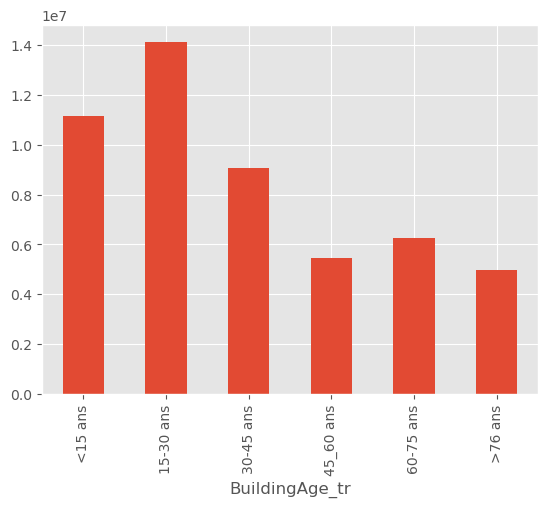

In [266]:
tranches = [0, 15, 30, 45, 60, 75, 116]
labels = ['<15 ans', '15-30 ans', '30-45 ans', '45_60 ans', '60-75 ans', '>76 ans']
df1['BuildingAge_tr'] = pd.cut(df1['Building_Age'], bins=tranches, labels=labels)

df1.groupby('BuildingAge_tr', observed=True)['SiteEnergyUse(kBtu)'].mean().plot(kind='bar')
plt.show()

In [268]:
df1['PropertyGFATotal'].describe()

count    1.594000e+03
mean     1.131978e+05
std      1.943162e+05
min      1.128500e+04
25%      2.927850e+04
50%      4.872450e+04
75%      1.040742e+05
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64

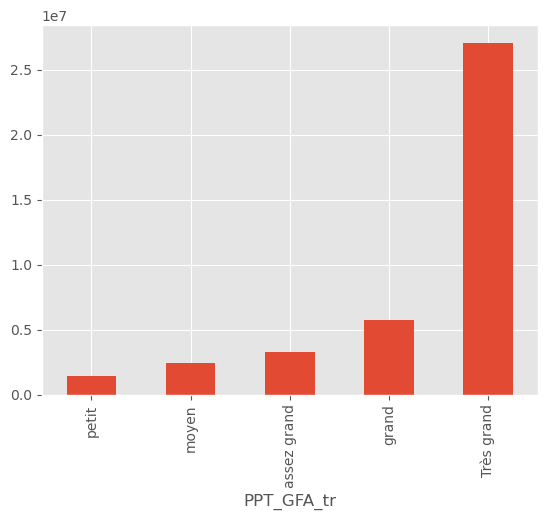

In [270]:
df1['PPT_GFA_tr'] = pd.qcut(df1['PropertyGFATotal'], q=5, labels=['petit', 'moyen','assez grand' ,'grand', 'Très grand'])

df1.groupby('PPT_GFA_tr', observed=True)['SiteEnergyUse(kBtu)'].mean().plot(kind='bar')
plt.show()

In [272]:
df1['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    289
Other                          248
Warehouse                      187
Large Office                   170
K-12 School                    125
Mixed Use Property             113
Retail Store                    91
Hotel                           76
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
University                      21
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

In [274]:
df1.loc[df1['PrimaryPropertyType'] == 'Office', 'PrimaryPropertyType'] = 'Small- and Mid-Sized Office'
df1.loc[df1['PrimaryPropertyType'] == 'Refrigerated Warehouse', 'PrimaryPropertyType'] = 'Warehouse'
df1.loc[df1['PrimaryPropertyType'] == 'Self-Storage Facility', 'PrimaryPropertyType'] = 'Warehouse'
df1.loc[df1['PrimaryPropertyType'] == 'Supermarket / Grocery Store', 'PrimaryPropertyType'] = 'Retail Store'
df1.loc[df1['PrimaryPropertyType'] == 'Restaurant', 'PrimaryPropertyType'] = 'Retail Store'
df1.loc[df1['PrimaryPropertyType'] == 'Medical Office', 'PrimaryPropertyType'] = 'Large Office'
df1.loc[df1['PrimaryPropertyType'] == 'Laboratory', 'PrimaryPropertyType'] = 'Small- and Mid-Sized Office'
df1.loc[df1['PrimaryPropertyType'] == 'Worship Facility', 'PrimaryPropertyType'] = 'Other'
df1.loc[df1['PrimaryPropertyType'] == 'Distribution Center', 'PrimaryPropertyType'] = 'Other'
df1.loc[df1['PrimaryPropertyType'] == 'Hotel', 'PrimaryPropertyType'] = 'Other'

df1['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Other                          446
Small- and Mid-Sized Office    302
Warehouse                      227
Large Office                   209
Retail Store                   141
K-12 School                    125
Mixed Use Property             113
University                      21
Hospital                        10
Name: count, dtype: int64

In [276]:
df1.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Mono-usage', 'zscore_energyuse',
       'zscore_totalemissions', 'Building_Age', 'Emissions_per_Surface',
       'GFA-1use_ratio', 'GFA_per_Floor', 'Emissions_per_floor', 'Elec_ratio',
       'steam_ratio', 'NGas_ratio', 'Elec_sourced_en', 'Steam_sourced_en',
       'NGas_sourced_en', 'BuildingAge_tr', 'PPT_GFA_tr'],
      dtype='object')

In [278]:
df1= df1.drop(columns=['YearBuilt', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)']).copy()

In [64]:
df1.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,GFA_per_Floor,Emissions_per_floor,Elec_ratio,steam_ratio,NGas_ratio,Elec_sourced_en,Steam_sourced_en,NGas_sourced_en,BuildingAge_tr,PPT_GFA_tr
0,1,NonResidential,Other,DOWNTOWN,47.61220,-122.33799,12,88434,0,88434,...,7369.500000,20.831667,0.546060,0.277302,0.176638,1,1,1,>76 ans,grand
1,2,NonResidential,Other,DOWNTOWN,47.61317,-122.33393,11,103566,15064,88502,...,9415.090909,26.896364,0.386609,0.000000,0.613391,1,0,1,15-30 ans,grand
2,3,NonResidential,Other,DOWNTOWN,47.61393,-122.33810,41,956110,196718,759392,...,23319.756098,50.958049,0.682307,0.297113,0.020579,1,1,1,45_60 ans,Très grand
3,5,NonResidential,Other,DOWNTOWN,47.61412,-122.33664,10,61320,0,61320,...,6132.000000,28.643000,0.407519,0.325913,0.266567,1,1,1,>76 ans,assez grand
4,8,NonResidential,Other,DOWNTOWN,47.61375,-122.34047,18,175580,62000,113580,...,9754.444444,28.056111,0.378802,0.000000,0.621198,1,0,1,30-45 ans,Très grand


In [280]:
df1.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Mono-usage', 'zscore_energyuse',
       'zscore_totalemissions', 'Building_Age', 'Emissions_per_Surface',
       'GFA-1use_ratio', 'GFA_per_Floor', 'Emissions_per_floor', 'Elec_ratio',
       'steam_ratio', 'NGas_ratio', 'Elec_sourced_en', 'Steam_sourced_en',
       'NGas_sourced_en', 'BuildingAge_tr', 'PPT_GFA_tr'],
      dtype='object')

In [282]:
df1['Building_Age'].corr(df1['SiteEnergyUse(kBtu)'])

-0.13692425304344208

In [284]:
df1['SiteEnergyUse(kBtu)'].describe()

count    1.594000e+03
mean     7.982803e+06
std      2.193257e+07
min      1.680890e+04
25%      1.244409e+06
50%      2.546626e+06
75%      6.872129e+06
max      4.483853e+08
Name: SiteEnergyUse(kBtu), dtype: float64

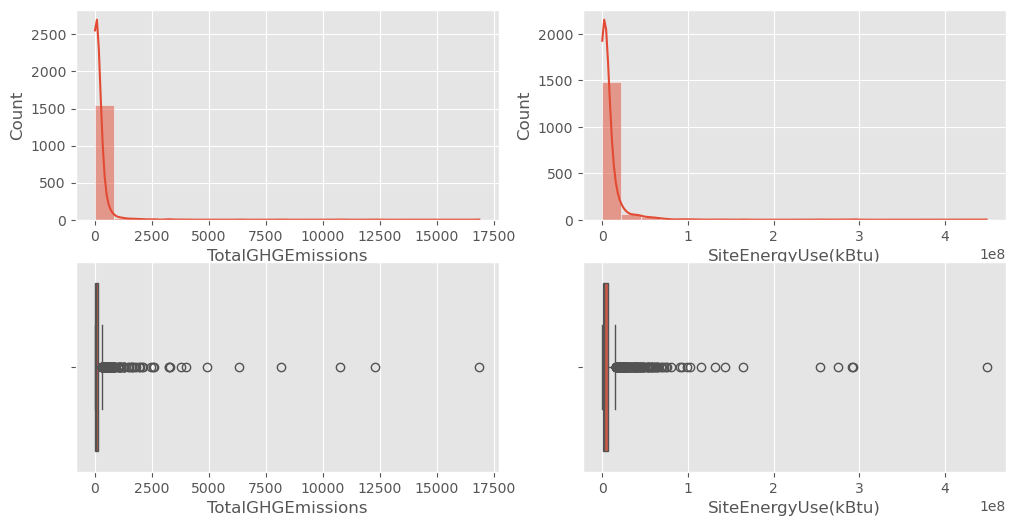

In [286]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(12, 6))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.histplot(df1[label], bins=20, kde=True)
    plt.subplot(2,2,i+3)
    sns.boxplot(df1[label], orient="h")
plt.show()

In [288]:
# les graphes ci-dessus montrent qu il existe bien des outliers. nous allons essayer de les traiter avec log.

df1['log_EnergyUse'] = np.log(df1['SiteEnergyUse(kBtu)'] + 1)
df1['log_TotEmiss'] = np.log(df1['TotalGHGEmissions'] + 1)
df1.describe()

,OSEBuildingID,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,GFA_per_Floor,Emissions_per_floor,Elec_ratio,steam_ratio,NGas_ratio,Elec_sourced_en,Steam_sourced_en,NGas_sourced_en,log_EnergyUse,log_TotEmiss
count,1594.000000,1594.000000,1594.000000,1594.000000,1.594000e+03,1594.000000,1.594000e+03,1.590000e+03,831.000000,344.000000,...,1.594000e+03,1594.000000,1.594000e+03,1594.000000,1594.000000,1594.0,1594.000000,1594.000000,1594.000000,1594.000000
mean,16130.085320,47.615028,-122.333179,4.126725,1.131978e+05,13142.170640,1.000556e+05,9.263362e+04,36417.233811,15151.852903,...,inf,inf,7.010966e-01,0.020579,0.276135,1.0,0.068381,0.718319,14.900666,3.981897
std,13640.772034,0.048075,0.024448,6.655942,1.943162e+05,42884.878278,1.722470e+05,1.594117e+05,66945.302667,37235.381312,...,NaN,NaN,2.624160e-01,0.089444,0.262974,0.0,0.252479,0.449960,1.317630,1.442059
min,1.000000,47.499170,-122.411820,0.000000,1.128500e+04,0.000000,1.092500e+04,5.656000e+03,0.000000,0.000000,...,2.216970e+02,0.022929,8.631096e-07,0.000000,0.000000,1.0,0.000000,0.000000,9.729723,0.113329
25%,583.250000,47.584335,-122.343225,1.000000,2.927850e+04,0.000000,2.829800e+04,2.541700e+04,5350.000000,2656.000000,...,1.332451e+04,7.567500,4.913016e-01,0.000000,0.000000,1.0,0.000000,0.000000,14.034172,3.048562
50%,21141.500000,47.611900,-122.333160,2.000000,4.872450e+04,0.000000,4.672100e+04,4.300800e+04,12000.000000,6000.000000,...,2.290176e+04,19.640076,7.091947e-01,0.000000,0.238338,1.0,0.000000,1.000000,14.750280,3.916314
75%,24584.000000,47.648330,-122.322198,4.000000,1.040742e+05,0.000000,9.445250e+04,9.025875e+04,31954.500000,13106.250000,...,3.800375e+04,48.195417,9.999920e-01,0.000000,0.490191,1.0,0.000000,1.000000,15.742984,4.910981
max,50226.000000,47.733870,-122.258640,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,639931.000000,459748.000000,...,inf,inf,1.000011e+00,0.766987,0.999999,1.0,1.000000,1.000000,19.921163,9.733410


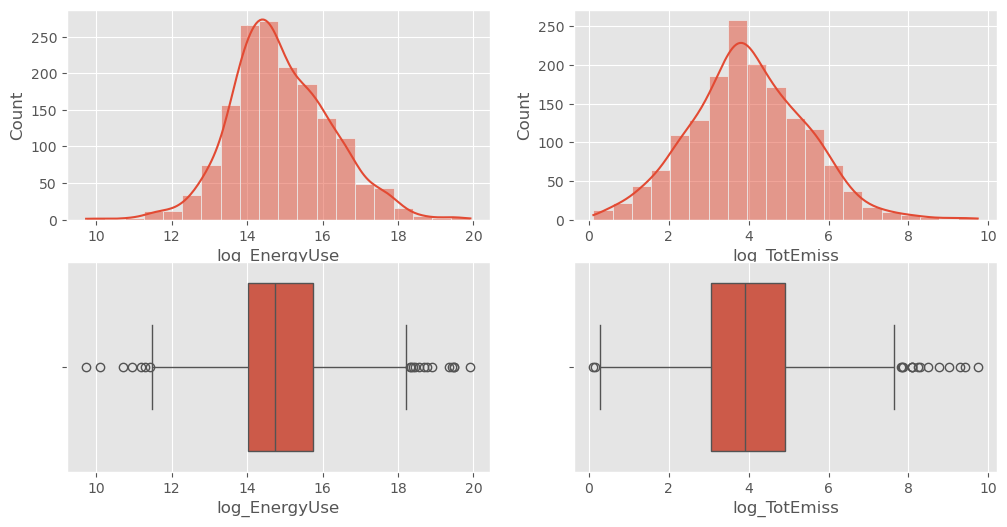

In [290]:
fig = plt.figure(1, figsize=(12, 6))
for i,label in enumerate(["log_EnergyUse", "log_TotEmiss"]) :
    plt.subplot(2,2,i+1)
    sns.histplot(df1[label], bins=20, kde=True)
    plt.subplot(2,2,i+3)
    sns.boxplot(df1[label], orient="h")
plt.show()

# même avec le log il y a encore des outliers. Je vais faire un zscore pour voir combien il y en a.

In [292]:
df1['zscore_logEnerUse'] = stats.zscore(df1['log_EnergyUse'])
df1.loc[df1['zscore_logEnerUse']> 2].shape

(53, 40)

In [294]:
df1 = df1[df1['zscore_logEnerUse'].abs() < 2]

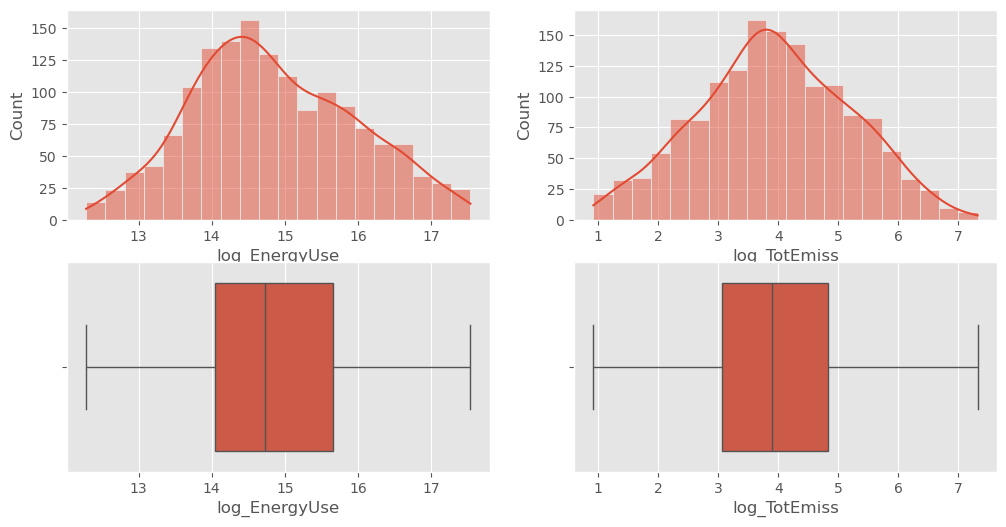

In [296]:
fig = plt.figure(1, figsize=(12, 6))
for i,label in enumerate(["log_EnergyUse", "log_TotEmiss"]) :
    plt.subplot(2,2,i+1)
    sns.histplot(df1[label], bins=20, kde=True)
    plt.subplot(2,2,i+3)
    sns.boxplot(df1[label], orient="h")
plt.show()

In [298]:
# les distributions montrent que nous avons supprimer les outliers.

In [300]:
IQR = np.quantile(df1.log_EnergyUse, q=[0.25, 0.75])
lim_basse_EnerUse = IQR[0] - 1.5*(IQR[1] - IQR[0])
lim_haute_EnerUse= IQR[1] + 1.5*(IQR[1] - IQR[0])

nb_bas = df1[df1.log_EnergyUse < lim_basse_EnerUse].shape[0]
nb_haut = df1[df1.log_EnergyUse > lim_haute_EnerUse].shape[0]

print('le nombre des outliers bas avec la méthode IQR est de :', nb_bas)
print('le nombre des outliers haut avec la méthode IQR est de :', nb_haut)

le nombre des outliers bas avec la méthode IQR est de : 0
le nombre des outliers haut avec la méthode IQR est de : 0


In [302]:
CORR = df1[[ 'NumberofFloors', 'PropertyGFATotal','PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Mono-usage', 'zscore_energyuse',
       'zscore_totalemissions', 'Building_Age', 'Emissions_per_Surface',
       'GFA-1use_ratio', 'GFA_per_Floor', 'Emissions_per_floor', 'Elec_ratio',
       'steam_ratio', 'NGas_ratio', 'Elec_sourced_en', 'Steam_sourced_en',
       'NGas_sourced_en']].corr()

CORR

,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),...,Emissions_per_Surface,GFA-1use_ratio,GFA_per_Floor,Emissions_per_floor,Elec_ratio,steam_ratio,NGas_ratio,Elec_sourced_en,Steam_sourced_en,NGas_sourced_en
NumberofFloors,1.000000,0.604336,0.378924,0.584293,0.580350,0.503259,0.341005,-0.028817,0.012241,0.480430,...,-0.077278,-0.082859,-0.145349,-0.155782,0.166622,0.169135,-0.220831,NaN,0.235715,-0.139209
PropertyGFATotal,0.604336,1.000000,0.629783,0.965910,0.928987,0.812521,0.562473,-0.040290,0.011684,0.748147,...,-0.129419,-0.138078,0.368056,0.084197,0.190583,0.074309,-0.215698,NaN,0.151497,-0.045879
PropertyGFAParking,0.378924,0.629783,1.000000,0.407226,0.504607,0.552648,0.317893,0.026438,0.077773,0.418293,...,-0.110374,-0.205544,0.118734,-0.044288,0.192995,-0.029097,-0.180118,NaN,0.012172,-0.085910
PropertyGFABuilding(s),0.584293,0.965910,0.407226,1.000000,0.924123,0.773781,0.556330,-0.056171,-0.012182,0.740265,...,-0.115386,-0.093848,0.394823,0.114514,0.159767,0.097070,-0.193589,NaN,0.174074,-0.025313
LargestPropertyUseTypeGFA,0.580350,0.928987,0.504607,0.924123,1.000000,0.750115,0.330884,-0.062277,-0.018858,0.749022,...,-0.110148,0.071229,0.414608,0.131640,0.160777,0.089493,-0.192320,NaN,0.157435,-0.030393
SecondLargestPropertyUseTypeGFA,0.503259,0.812521,0.552648,0.773781,0.750115,1.000000,0.540910,-0.081557,-0.029026,0.643206,...,-0.146326,-0.106494,0.232261,-0.048568,0.205671,0.022152,-0.212982,NaN,0.104169,-0.018664
ThirdLargestPropertyUseTypeGFA,0.341005,0.562473,0.317893,0.556330,0.330884,0.540910,1.000000,-0.023277,0.024140,0.482610,...,-0.093846,-0.194148,0.180103,0.021564,0.115798,0.003241,-0.113871,NaN,0.029165,0.032311
SiteEUIWN(kBtu/sf),-0.028817,-0.040290,0.026438,-0.056171,-0.062277,-0.081557,-0.023277,1.000000,0.941125,0.443708,...,0.804214,-0.073872,-0.025745,0.559017,-0.157874,0.042644,0.137363,NaN,0.028729,0.140838
SourceEUIWN(kBtu/sf),0.012241,0.011684,0.077773,-0.012182,-0.018858,-0.029026,0.024140,0.941125,1.000000,0.465850,...,0.598105,-0.096013,-0.020108,0.438245,0.085011,0.012478,-0.087541,NaN,0.011412,-0.001256
SiteEnergyUse(kBtu),0.480430,0.748147,0.418293,0.740265,0.749022,0.643206,0.482610,0.443708,0.465850,1.000000,...,0.273228,-0.071958,0.316132,0.427291,0.072124,0.138957,-0.125692,NaN,0.194865,0.048409


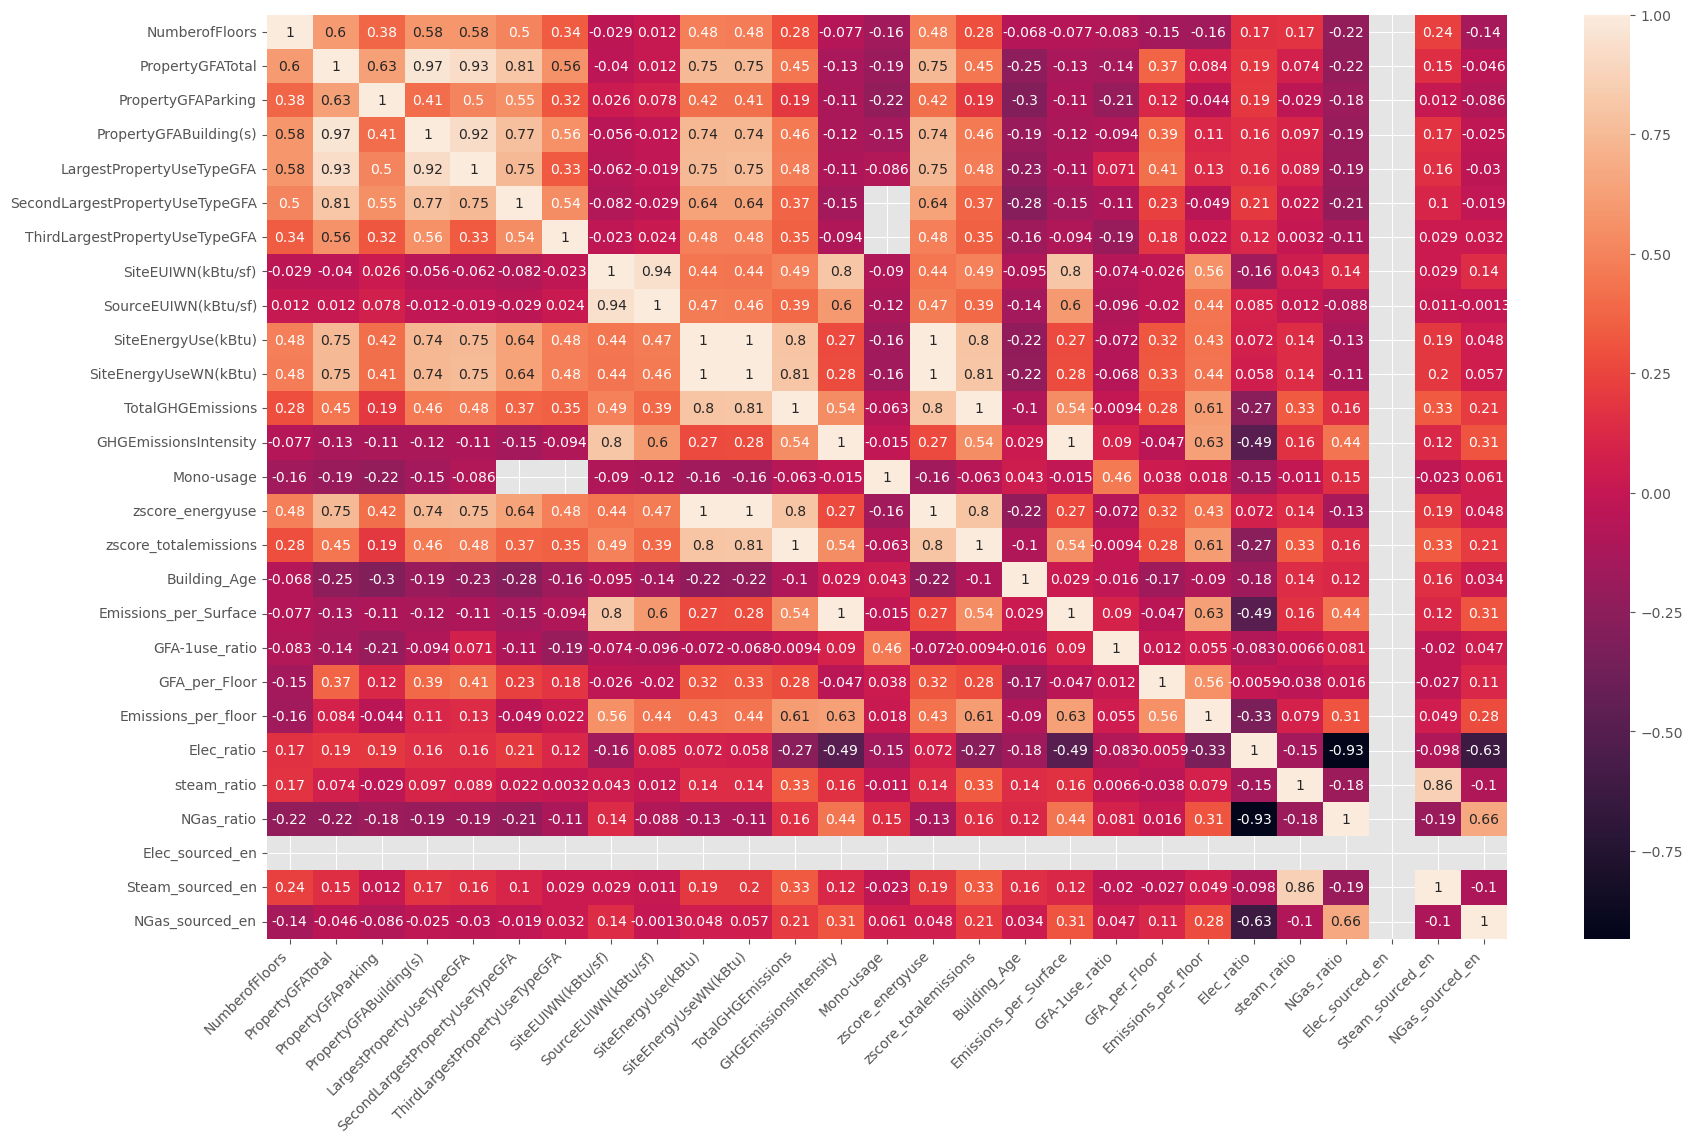

In [304]:
plt.figure(figsize=(20, 12))

sns.heatmap(df1[[ 'NumberofFloors', 'PropertyGFATotal','PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Mono-usage', 'zscore_energyuse',
       'zscore_totalemissions', 'Building_Age', 'Emissions_per_Surface',
       'GFA-1use_ratio', 'GFA_per_Floor', 'Emissions_per_floor', 'Elec_ratio',
       'steam_ratio', 'NGas_ratio', 'Elec_sourced_en', 'Steam_sourced_en',
       'NGas_sourced_en']].corr(), annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()

In [306]:
df1= df1.drop(columns=['LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA','SourceEUIWN(kBtu/sf)', 'PropertyGFABuilding(s)', 'zscore_energyuse',
       'zscore_totalemissions', 'Elec_sourced_en', 'Steam_sourced_en',
       'NGas_sourced_en','SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'log_EnergyUse',
       'log_TotEmiss', 'zscore_logEnerUse']).copy()

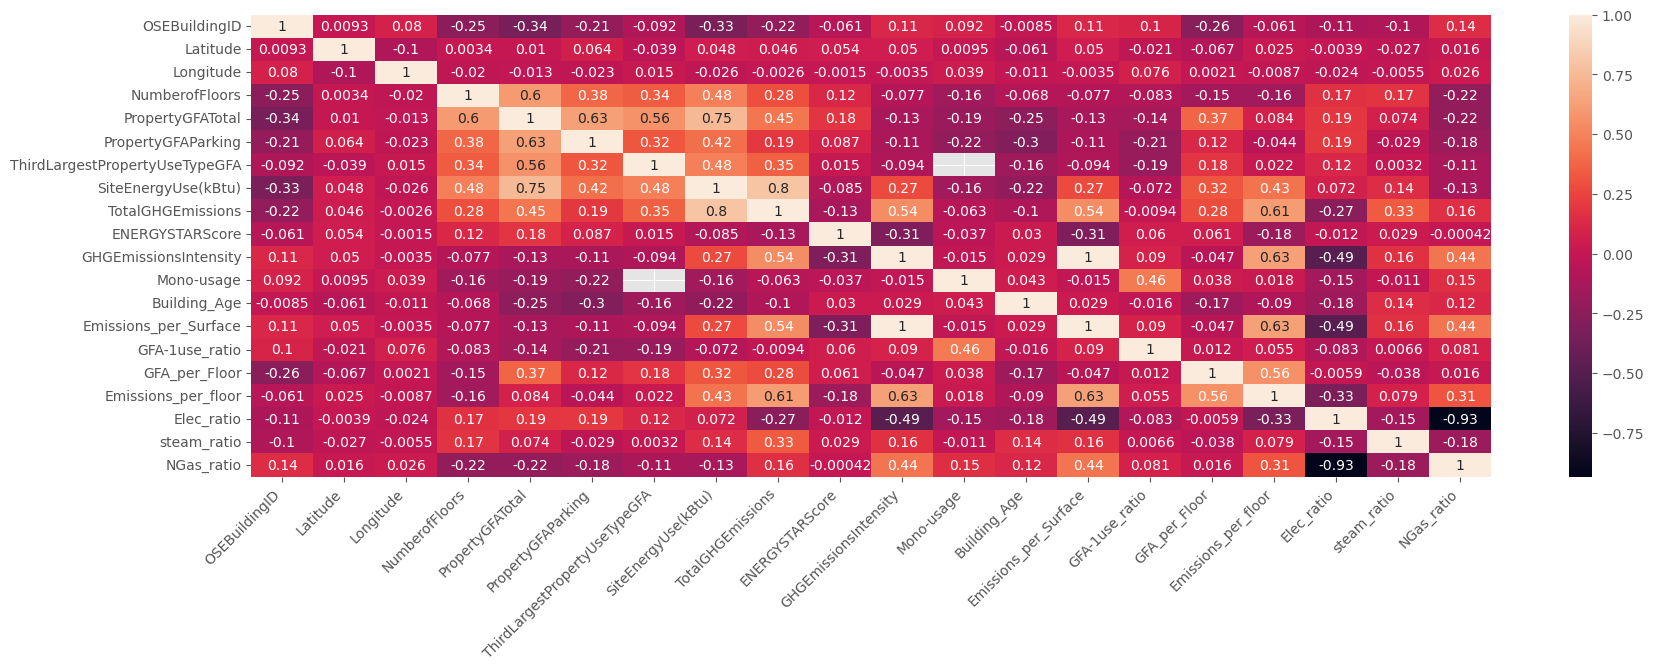

In [308]:
plt.figure(figsize=(20,6))

sns.heatmap(df1[[ 'OSEBuildingID','Latitude', 'Longitude','NumberofFloors', 'PropertyGFATotal','PropertyGFAParking', 'ThirdLargestPropertyUseTypeGFA',
'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'ENERGYSTARScore',
'GHGEmissionsIntensity', 'Mono-usage',  'Building_Age', 'Emissions_per_Surface',
'GFA-1use_ratio', 'GFA_per_Floor', 'Emissions_per_floor', 'Elec_ratio',
'steam_ratio', 'NGas_ratio']].corr(), annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()

In [310]:
df1.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ListOfAllPropertyUseTypes',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Mono-usage', 'Building_Age', 'Emissions_per_Surface', 'GFA-1use_ratio',
       'GFA_per_Floor', 'Emissions_per_floor', 'Elec_ratio', 'steam_ratio',
       'NGas_ratio', 'BuildingAge_tr', 'PPT_GFA_tr'],
      dtype='object')

In [312]:
df1.dtypes

OSEBuildingID                        int64
BuildingType                        object
PrimaryPropertyType                 object
Neighborhood                        object
Latitude                           float64
Longitude                          float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
ListOfAllPropertyUseTypes           object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUse(kBtu)                float64
TotalGHGEmissions                  float64
GHGEmissionsIntensity              float64
Mono-usage                            bool
Building_Age                         int64
Emissions_per_Surface              float64
GFA-1use_ratio                     float64
GFA_per_Floor                      float64
Emissions_per_floor                float64
Elec_ratio                         float64
steam_ratio                        float64
NGas_ratio 

In [314]:
df1['BuildingType'].value_counts()

BuildingType
NonResidential        1328
SPS-District K-12       84
Nonresidential COS      83
Campus                  17
Nonresidential WA        1
Name: count, dtype: int64

In [316]:
df1.loc[df1['BuildingType'] == 'Nonresidential WA', 'BuildingType'] = 'Campus'
df1['BuildingType'].value_counts()
# on a intégrer le seul non residential WA dans campus car c'est un campus universitaire.
# il nous restera 4 catégories à encoder.

BuildingType
NonResidential        1328
SPS-District K-12       84
Nonresidential COS      83
Campus                  18
Name: count, dtype: int64

In [318]:
df1['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Other                          420
Small- and Mid-Sized Office    298
Warehouse                      213
Large Office                   193
Retail Store                   139
K-12 School                    124
Mixed Use Property             106
University                      19
Hospital                         1
Name: count, dtype: int64

In [320]:
df1 = df1[df1['PrimaryPropertyType'] != 'Hospital']
# il ne restait qu'un hopital qu'on a supprimer pour faciliter l'encodage des colonnes catégorielles.

In [322]:
df1['PrimaryPropertyType'].value_counts()
# il nous reste 8 catégories à encoder.

PrimaryPropertyType
Other                          420
Small- and Mid-Sized Office    298
Warehouse                      213
Large Office                   193
Retail Store                   139
K-12 School                    124
Mixed Use Property             106
University                      19
Name: count, dtype: int64

In [324]:
df1['Neighborhood'].value_counts()
# on va regrouper Neighborhood en 3 grandes régions de Seattle ( north, central et south )

Neighborhood
GREATER DUWAMISH          328
DOWNTOWN                  322
MAGNOLIA / QUEEN ANNE     141
LAKE UNION                135
NORTHEAST                 106
EAST                      105
NORTHWEST                  77
BALLARD                    59
NORTH                      52
CENTRAL                    43
SOUTHEAST                  41
DELRIDGE                   41
SOUTHWEST                  37
North                       8
Ballard                     6
Delridge                    4
Northwest                   3
Central                     3
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [326]:
df1['Neighborhood'] = df1['Neighborhood'].str.upper().str.strip() # pour tout mettre en majuscule et supprimer les espaces.

regions = { 'GREATER DUWAMISH': 'SOUTH END',
    'SOUTHEAST': 'SOUTH END',
    'SOUTHWEST': 'SOUTH END',
    'DELRIDGE': 'SOUTH END',
    'DELRIDGE NEIGHBORHOODS': 'SOUTH END',
    'DELDRIDGE': 'SOUTH END',

    'DOWNTOWN': 'CENTRAL CITY',
    'LAKE UNION': 'CENTRAL CITY',
    'EAST': 'CENTRAL CITY',
    'CENTRAL': 'CENTRAL CITY',

    'MAGNOLIA / QUEEN ANNE': 'NORTH END',
    'NORTHEAST': 'NORTH END',
    'NORTH': 'NORTH END',
    'NORTHWEST': 'NORTH END',
    'BALLARD': 'NORTH END'}

# je crée un dictionnaire avec les neighborhoods et leurs régions 

df1['District'] = df1['Neighborhood'].replace(regions)
# je remplace les valeurs de Neighborhood par District

In [328]:
df1=df1.drop(columns = 'Neighborhood') 
# je supprime la colonne Neighborhood

In [330]:
df1['District'].value_counts()

District
CENTRAL CITY    608
SOUTH END       452
NORTH END       452
Name: count, dtype: int64

In [332]:
df1['ListOfAllPropertyUseTypes'].value_counts()
# nous allons supprimer cette colonne, comme nous avons déjà primary property use type qui est renseignée, 
#  et qu'il est compliquer de coder 331 lignes.

ListOfAllPropertyUseTypes
Office                                                                                    135
K-12 School                                                                               120
Office, Parking                                                                           114
Non-Refrigerated Warehouse                                                                 94
Non-Refrigerated Warehouse, Office                                                         61
                                                                                         ... 
Office, Other - Technology/Science, Parking                                                 1
Financial Office, Food Service, Office, Other                                               1
Data Center, Medical Office, Office, Parking, Restaurant                                    1
College/University, Parking                                                                 1
Fitness Center/Health Club/Gym, Of

In [334]:
df1=df1.drop(columns = 'ListOfAllPropertyUseTypes') 

In [336]:
df1['BuildingAge_tr'].value_counts()
# nous avons 6 tranches à encoder.

BuildingAge_tr
>76 ans      431
45_60 ans    293
15-30 ans    225
30-45 ans    211
<15 ans      201
60-75 ans    151
Name: count, dtype: int64

In [338]:
df1['PPT_GFA_tr'].value_counts()
# nous avons 5 tranches à encoder.

PPT_GFA_tr
grand          317
moyen          313
assez grand    313
petit          302
Très grand     267
Name: count, dtype: int64

In [340]:
df1=df1.drop(columns = 'OSEBuildingID') 

In [342]:
df1.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Latitude', 'Longitude',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Mono-usage', 'Building_Age', 'Emissions_per_Surface', 'GFA-1use_ratio',
       'GFA_per_Floor', 'Emissions_per_floor', 'Elec_ratio', 'steam_ratio',
       'NGas_ratio', 'BuildingAge_tr', 'PPT_GFA_tr', 'District'],
      dtype='object')

In [344]:
EnergyUse_target = df1[['SiteEnergyUse(kBtu)']]
Emissions_target =df1[['TotalGHGEmissions']]
EnergyUse_target
# je sépare les targeted features

,SiteEnergyUse(kBtu)
0,7.226362e+06
1,8.387933e+06
3,6.794584e+06
4,1.417261e+07
5,1.208662e+07
...,...
3371,8.497457e+05
3372,9.502762e+05
3373,5.765898e+06
3374,7.194712e+05


In [346]:
Emissions_target

,TotalGHGEmissions
0,249.98
1,295.86
3,286.43
4,505.01
5,301.81
...,...
3371,20.94
3372,32.17
3373,223.54
3374,22.11


In [348]:
df_features = df1.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'BuildingAge_tr','PPT_GFA_tr','ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore' ])
df_features.head()
# je crée un DF avec l'ensemble des features hors targeted ones

,BuildingType,PrimaryPropertyType,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,GHGEmissionsIntensity,Mono-usage,Building_Age,Emissions_per_Surface,GFA-1use_ratio,GFA_per_Floor,Emissions_per_floor,Elec_ratio,steam_ratio,NGas_ratio,District
0,NonResidential,Other,47.61220,-122.33799,12,88434,0,2.83,True,89,0.002827,1.000000,7369.500000,20.831667,0.546060,0.277302,0.176638,CENTRAL CITY
1,NonResidential,Other,47.61317,-122.33393,11,103566,15064,2.86,False,20,0.002857,0.809918,9415.090909,26.896364,0.386609,0.000000,0.613391,CENTRAL CITY
3,NonResidential,Other,47.61412,-122.33664,10,61320,0,4.67,True,90,0.004671,1.000000,6132.000000,28.643000,0.407519,0.325913,0.266567,CENTRAL CITY
4,NonResidential,Other,47.61375,-122.34047,18,175580,62000,2.88,False,36,0.002876,0.703070,9754.444444,28.056111,0.378802,0.000000,0.621198,CENTRAL CITY
5,Nonresidential COS,Other,47.61623,-122.33657,2,97288,37198,3.10,True,17,0.003102,0.913062,48644.000000,150.905000,0.609884,0.000000,0.390116,CENTRAL CITY


In [350]:
indices_a_supprimer = [353, 487, 488, 1147, 1754, 1993, 2414, 2459, 3130, 3131, 3132, 3168, 3273]
df_features = df_features.drop(index=indices_a_supprimer) 
# SUPPRESSION DES INDICES QUI POSENT UN BUG LORS DE LA MODELISATION

In [352]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BuildingType           1499 non-null   object 
 1   PrimaryPropertyType    1499 non-null   object 
 2   Latitude               1499 non-null   float64
 3   Longitude              1499 non-null   float64
 4   NumberofFloors         1499 non-null   int64  
 5   PropertyGFATotal       1499 non-null   int64  
 6   PropertyGFAParking     1499 non-null   int64  
 7   GHGEmissionsIntensity  1499 non-null   float64
 8   Mono-usage             1499 non-null   bool   
 9   Building_Age           1499 non-null   int64  
 10  Emissions_per_Surface  1499 non-null   float64
 11  GFA-1use_ratio         1499 non-null   float64
 12  GFA_per_Floor          1499 non-null   float64
 13  Emissions_per_floor    1499 non-null   float64
 14  Elec_ratio             1499 non-null   float64
 15  steam_rat

In [358]:
mask_invalid = df_features.isna() | df_features.isin([np.inf, -np.inf])

# Lignes contenant au moins une valeur invalide
df_invalid_rows = df_features[mask_invalid.any(axis=1)]
df_invalid_rows 

,BuildingType,PrimaryPropertyType,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,GHGEmissionsIntensity,Mono-usage,Building_Age,Emissions_per_Surface,GFA-1use_ratio,GFA_per_Floor,Emissions_per_floor,Elec_ratio,steam_ratio,NGas_ratio,District


#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

# Modélisation 

### Import des modules 

In [1429]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [ ]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [ ]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE